In [338]:
import numpy as np 
import pandas as pd
import os

In [386]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo 
import plotly.io as pio
import sklearn
pd.set_option('display.max_columns',None)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
#new
#from sklearn.naive_bayes.MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import IsolationForest

from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /Users/iresh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [387]:
df = pd.read_csv("/path/to/Restaurant_reviews.csv")

In [388]:
# Check Dataset
print('### first 5 lines ###','\n')
df.head()

### first 5 lines ### 



,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


In [342]:
# Check Dataset
print('### last 5 lines ###','\n')
df.tail()

### last 5 lines ### 



,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0,NaN
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,NaN
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,NaN
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0,NaN
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6,NaN


In [343]:
# Check Dataframe information
print('### Dataframe information ###','\n')
df.info()

### Dataframe information ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  10000 non-null  object 
 1   Reviewer    9962 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9962 non-null   object 
 4   Metadata    9962 non-null   object 
 5   Time        9962 non-null   object 
 6   Pictures    10000 non-null  int64  
 7   7514        1 non-null      float64
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [344]:
# delete column '7514' as it has only one non-null value

df.drop(["7514"], axis=1, inplace=True)

In [345]:
# Check duplicate data

print("Number of duplicates: " + str(df.duplicated().sum()))

Number of duplicates: 36


In [346]:
# Delete duplicate data

df.drop_duplicates(inplace = True)

In [347]:
# Null Data
print('### Null Data ###','\n')
df.isna().sum()

### Null Data ### 



Restaurant    0
Reviewer      2
Review        9
Rating        2
Metadata      2
Time          2
Pictures      0
dtype: int64

In [348]:
# Let's exclude null values.
df = df.dropna()

In [349]:
# Null Data
print('### Null Data ###','\n')
df.isna().sum()

### Null Data ### 



Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [350]:
# Check row and column numbers

rows = df.shape[0] 
cols = df.shape[1] 
print("Rows   : " + str(rows)) 
print("Columns: " + str(cols))

Rows   : 9955
Columns: 7


In [351]:
# Numerical features
print('### Numerical features ###','\n')
df.describe(exclude=['O'])

### Numerical features ### 



,Pictures
count,9955.000000
mean,0.751984
std,2.575691
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


In [352]:
# Categorical features
print('### Categorical features ###','\n')
df.describe(include=['O'])

### Categorical features ### 



,Restaurant,Reviewer,Review,Rating,Metadata,Time
count,9955,9955,9955,9955,9955,9955
unique,100,7442,9364,10,2477,9775
top,Beyond Flavours,Ankita,good,5,1 Review,7/29/2018 20:34
freq,100,13,237,3826,916,3


In [353]:
df.nunique()

Restaurant     100
Reviewer      7442
Review        9364
Rating          10
Metadata      2477
Time          9775
Pictures        36
dtype: int64

In [354]:
# Check the unique values and frequency for 'Rating'

df['Rating'].value_counts()

Rating
5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: count, dtype: int64

In [355]:
df['Rating'] = df['Rating'].replace(['Like'], '5')

In [356]:
# Replace column type 'Rating' to 'float'.

df['Rating'] = df['Rating'].astype(float)

In [357]:
# Rating - Maximum and Minimum value

print("Maximum: " + str(df['Rating'].max()))
print("Minimum: " + str(df['Rating'].min()))

Maximum: 5.0
Minimum: 1.0


In [358]:
# Check the unique values and frequency for 'Rating'

df['Rating'].value_counts()

Rating
5.0    3827
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: count, dtype: int64

In [359]:
df['Rating'].unique()

array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5])

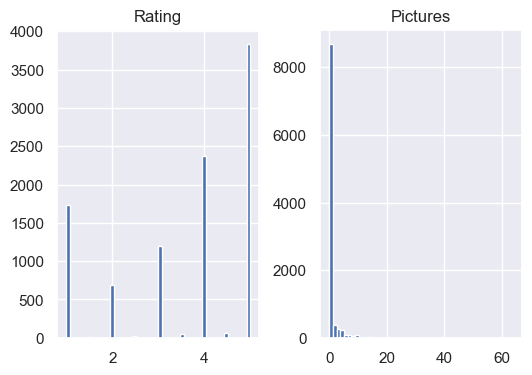

In [360]:
# Histogram

df.hist(bins=50, figsize=(6,4))
plt.show()

In [361]:
# Function to graph - Best Rating

def bar_chart(columnName):
    char_bar = df.groupby([columnName])['Rating'].mean().reset_index()
    char_bar = char_bar.sort_values(by=("Rating"), ascending=False)

    top = char_bar.head(10)
    fig = go.Figure()
    fig.add_trace(go.Bar(x=top[columnName], y=top["Rating"]))

    fig.update_layout(title="Best " + columnName + " by Rating",
                  xaxis_title=columnName,
                  yaxis_title= "Rating",
                  plot_bgcolor='black', 
                  paper_bgcolor='gray',  
                  font=dict(color='white'))

    pyo.init_notebook_mode(connected=True)
    pyo.iplot(fig)

In [362]:
bar_chart('Restaurant')

In [363]:
# Function to graph - Worst Rating

def bar_chart(columnName):
    char_bar = df.groupby([columnName])['Rating'].mean().reset_index()
    char_bar = char_bar.sort_values(by=("Rating"), ascending=True)

    top = char_bar.head(10)
    fig = go.Figure()
    fig.add_trace(go.Bar(x=top[columnName], y=top["Rating"]))

    fig.update_layout(title="Worst " + columnName + " by Rating",
                  xaxis_title=columnName,
                  yaxis_title= "Rating",
                  plot_bgcolor='black', 
                  paper_bgcolor='gray',  
                  font=dict(color='white'))

    pyo.init_notebook_mode(connected=True)
    pyo.iplot(fig)
    

In [364]:
bar_chart('Restaurant')

In [365]:
# Create a copy of the dataset with only columns Review and Rating 
df=df[['Review','Rating','Metadata']].copy()

# Rename columns
#df = df.rename(columns={'Review': 'text', 'Rating': 'label', 'Metadata':'label2'})
df = df.rename(columns={'Review': 'text', 'Rating': 'label'})
df

,text,label,Metadata
0,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers"
1,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers"
2,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers"
3,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower"
4,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers"
...,...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,3.0,"53 Reviews , 54 Followers"
9996,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers"
9997,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers"
9998,I personally love and prefer Chinese Food. Had...,4.0,"13 Reviews , 144 Followers"


In [366]:
df.info()
df.label.value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 9955 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   text      9955 non-null   object 
 1   label     9955 non-null   float64
 2   Metadata  9955 non-null   object 
dtypes: float64(1), object(2)
memory usage: 311.1+ KB


label
5.0    3827
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: count, dtype: int64

In [367]:
# This function returns sentiment value based on:
# label <= 3.0 -> Negative
# label > 3.0 -> Positive


def conv(row):
    if row['label'] == 3.0:
        val = 'Neutral'
    elif row['label'] < 3.0:
        val = 'Negative'
    else:
        val = 'Positive'
    return val
"""
def conv(row):
    
    if row['label'] <= 3.0:
        val = 'Negative'
    else: 
        val = 'Positive'
    
    return val
"""

"\ndef conv(row):\n    \n    if row['label'] <= 3.0:\n        val = 'Negative'\n    else: \n        val = 'Positive'\n    \n    return val\n"

In [368]:
# Applying the function in our dataset
df['label'] = df.apply(conv, axis=1)
df

,text,label,Metadata
0,"The ambience was good, food was quite good . h...",Positive,"1 Review , 2 Followers"
1,Ambience is too good for a pleasant evening. S...,Positive,"3 Reviews , 2 Followers"
2,A must try.. great food great ambience. Thnx f...,Positive,"2 Reviews , 3 Followers"
3,Soumen das and Arun was a great guy. Only beca...,Positive,"1 Review , 1 Follower"
4,Food is good.we ordered Kodi drumsticks and ba...,Positive,"3 Reviews , 2 Followers"
...,...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,Neutral,"53 Reviews , 54 Followers"
9996,This place has never disappointed us.. The foo...,Positive,"2 Reviews , 53 Followers"
9997,"Bad rating is mainly because of ""Chicken Bone ...",Negative,"65 Reviews , 423 Followers"
9998,I personally love and prefer Chinese Food. Had...,Positive,"13 Reviews , 144 Followers"


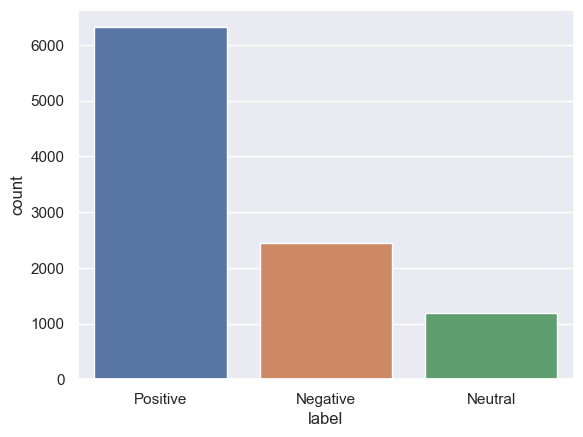

In [369]:
sns.countplot(x ='label', data = df)
 
plt.show()

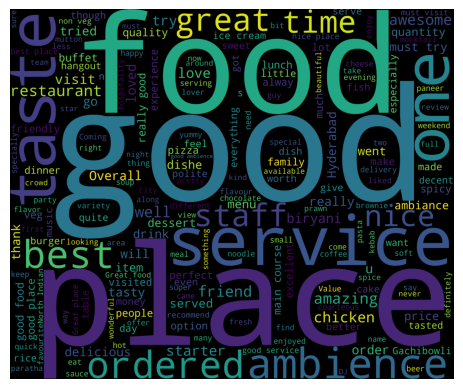

In [370]:
# WordCloud - Sentiment Positive

df1 = df[df['label']== 'Positive']
words = ' '.join(df1['text'].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='black',stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

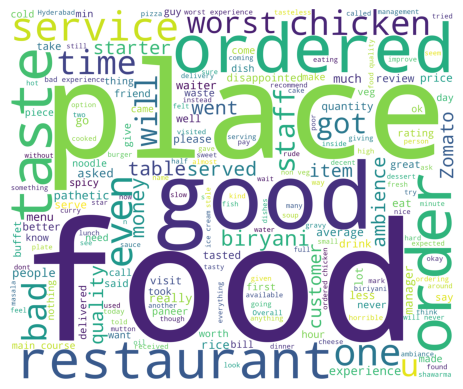

In [371]:
# WordCloud - Sentiment Negative

df2 = df[df['label']=='Negative']
words = ' '.join(df2['text'].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='white',stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [372]:
def review_to_words(review):
    letters_only = re.sub('^[a-zA-Z]',' ',review)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_word = [w for w in words if w not in stops]
    return ' '.join(meaningful_word)

In [373]:
def review_len(review):
    letters_only = re.sub('^[a-zA-Z]',' ',review)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_word = [w for w in words if w not in stops]
    return (len(meaningful_word))

In [374]:
df['labels'] = df['label'].apply(lambda x:0 if x=='negative' else 1)
df['clean_review'] = df['text'].astype(str).apply(lambda x:review_to_words(x))
df['review_length'] = df['text'].astype(str).apply(lambda x:review_len(x))
train_data, test_data = train_test_split(df,test_size=0.2,random_state=123)

In [375]:
train_clean_review = []
for reviewtweet in train_data['clean_review']:
    train_clean_review.append(reviewtweet)
test_clean_review = []
for review in test_data['clean_review']:
    test_clean_review.append(review)

In [376]:
"""
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer='word')
train_features = v.fit_transform(train_clean_review)
test_features = v.transform(test_clean_review)
"""
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
train_features = tfidf_vectorizer.fit_transform(train_clean_review)
test_features = tfidf_vectorizer.transform(test_clean_review)



In [402]:
param_grid = {
    'LogisticRegression': {
        'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
        'max_iter': [100, 200, 300],
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7],
    },
    'DecisionTreeClassifier': {
        'max_depth': [None, 10, 20, 30],
    },
    'RandomForestClassifier': {
        'n_estimators': [100, 200, 300],
    },
    'AdaBoostClassifier': {
        'n_estimators': [50, 100, 200],
    },
    'GaussianNB': {},
    'CatBoostClassifier': {
        'iterations': [100, 200, 300],
    },
    'SGDClassifier': {
        'alpha': [0.0001, 0.001, 0.01],
    },
    'LGBMClassifier': {
        'n_estimators': [50, 100, 200],
    },
    'BaggingClassifier': {
        'n_estimators': [10, 20, 30],
    },
    'GradientBoostingClassifier': {
        'n_estimators': [100, 200, 300],
    },
    'NearestCentroid': {},
    'QuadraticDiscriminantAnalysis': {},
    
}

In [404]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB(),
    CatBoostClassifier(verbose=False),
    SGDClassifier(),
    #XGBClassifier(test_size=0.2, random_state=42),
    LGBMClassifier(),
    BaggingClassifier(),
    GradientBoostingClassifier(),
    NearestCentroid(),
    #QuadraticDiscriminantAnalysis(),
    #IsolationForest(),
]

In [405]:
Accuracy = []
Model = []
best_classifiers = []

for classifier in Classifiers:
    classifier_name = classifier.__class__.__name__

    if classifier_name in param_grid:
        hyperparameters = param_grid[classifier_name]
        
        grid_search = GridSearchCV(classifier, hyperparameters, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

        try:
            fit = grid_search.fit(train_features, train_data['label'])
            pred = fit.predict(test_features)
        except Exception:
            fit = grid_search.fit(dense_features, train_data['label'])
            pred = fit.predict(dense_test)
    else:
        try:
            fit = classifier.fit(train_features, train_data['label'])
            pred = fit.predict(test_features)
        except Exception:
            fit = classifier.fit(dense_features, train_data['label'])
            pred = fit.predict(dense_test)

    accuracy = accuracy_score(pred, test_data['label']) * 100
    Accuracy.append(accuracy)
    Model.append(classifier_name)
    best_classifiers.append(fit.best_estimator_)

    print(f'Accuracy of {classifier_name} is: {accuracy:.2f}%')

best_accuracy_index = Accuracy.index(max(Accuracy))
best_classifier = best_classifiers[best_accuracy_index]
print(f'Best classifier: {best_classifier.__class__.__name__} with accuracy {max(Accuracy):.2f}%')

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Accuracy of LogisticRegression is: 82.02%
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Accuracy of KNeighborsClassifier is: 64.89%
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Accuracy of DecisionTreeClassifier is: 72.78%
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Accuracy of RandomForestClassifier is: 80.51%
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Accuracy of AdaBoostClassifier is: 78.70%
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Accuracy of GaussianNB is: 49.22%
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Accuracy of CatBoostClassifier is: 78.35%
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Accuracy of SGDClassifier is: 82.12%
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Accuracy of LGBMClassifier is: 81.06%
Fitting 3 folds for each of 3 candid

In [ ]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train_data['label'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train_data['label'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test_data['label'])*100
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is: '+str(accuracy) + '%')

In [406]:
result = pd.DataFrame({'Models':Model})
result['Accuracy'] = Accuracy
result = result.sort_values(by='Accuracy',ascending=False)
result

,Models,Accuracy
7,SGDClassifier,82.119538
0,LogisticRegression,82.019086
8,LGBMClassifier,81.064792
3,RandomForestClassifier,80.512305
10,GradientBoostingClassifier,79.809141
4,AdaBoostClassifier,78.704169
6,CatBoostClassifier,78.352587
9,BaggingClassifier,77.800100
2,DecisionTreeClassifier,72.777499
11,NearestCentroid,65.946760


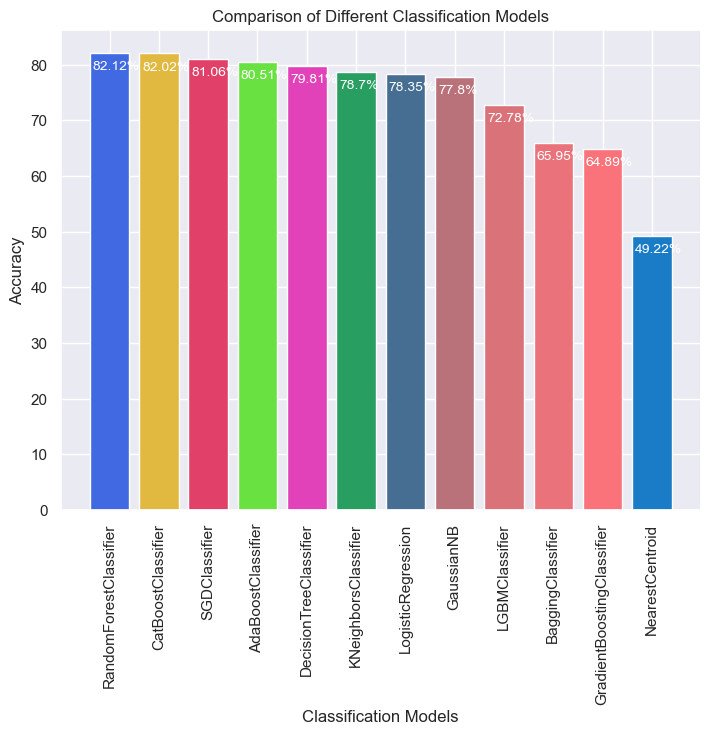

In [408]:
sns.set()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ['RandomForestClassifier', 'CatBoostClassifier', 'SGDClassifier', 'AdaBoostClassifier',
          'DecisionTreeClassifier', 'KNeighborsClassifier', 'LogisticRegression', 'GaussianNB', 
          'LGBMClassifier','BaggingClassifier' ,'GradientBoostingClassifier','NearestCentroid',
        ]
Accuracy= result['Accuracy']
ax.bar(Models,Accuracy,color=['#4169e1', '#e1b941', '#e14169', '#69e141','#e141b9','#289f61','#456e92', '#ba727a','#da727a','#ea727a','#fa727a','#1a7cc7','#33a727','#ffff34']);
for i in ax.patches:
    ax.text(i.get_x()+.06, i.get_height()-3.0, str(round(i.get_height(),2))+ '%', fontsize=10, color='white')
plt.title('Comparison of Different Classification Models');
plt.ylabel('Accuracy');
plt.xlabel('Classification Models')
plt.xticks(rotation=90);